# **Data Visualization Notebook**

## Objectives

* Answer business requirement 1: 
* The client is interested in conducting a study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.

## Inputs

* Resized Train Dataset
* Resized Validation Dataset
* Resized Test Dataset

## Outputs

* Average images and variability images for each class (healthy or powdery mildew).
* The differences between average healthy and average powdery mildew cherry leaves.
* An image montage for each class.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between mildew infected leaves and non-infected images.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.


## Additional Comments

* No additional comments.



---

# Set Data Directory

---

## Import libraries

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import pandas as pd

sns.set_style("white")

## Set working directory

In [35]:
cwd= os.getcwd()

In [36]:
os.chdir('/workspace/mildew-detection')
print("You set a new current directory")

You set a new current directory


In [37]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detection'

## Import dataframes

In [38]:
import pandas as pd

# Paths to the CSV files previously created
train_csv_path = 'train_dataframe.csv'
validation_csv_path = 'validation_dataframe.csv'
test_csv_path = 'test_dataframe.csv'

# Read the CSV files into dataframes
train_df = pd.read_csv(train_csv_path)
validation_df = pd.read_csv(validation_csv_path)
test_df = pd.read_csv(test_csv_path)

---

## Set input directories

Set train, validation and test paths using the dataframes

In [39]:
# Define input directories from dataframes
train_path = train_df['file']
validation_path = validation_df['file']
test_path = test_df['file']

In [40]:
data_dir = 'inputs/datasets'
train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

## Set output directory

In [41]:
import os

# Define the directory 
work_dir = '/workspace/mildew-detection'

# Find the latest version number
versions = [name for name in os.listdir(os.path.join(work_dir, 'outputs')) if name.startswith('v')]
if versions:
    latest_version = max(versions)
    version_number = int(latest_version[1:]) + 1
else:
    version_number = 1

# Create the new version directory
version = f'v{version_number}'
file_path = os.path.join(work_dir, 'outputs', version)

if not os.path.exists(file_path):
    os.makedirs(file_path)
    print(f'New version {version} created successfully!')
else:
    print('Error: Directory already exists for the new version.')

New version v7 created successfully!


### Set label names

In [44]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


---

# Data visualisation of image data

---

## Average and variability of images per label

### Function to load images in an array (tensor)

In [45]:
from tensorflow.keras.preprocessing import image


def load_image_as_array(data_dir, new_size=(100, 100), n_images_per_label=20):

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(data_dir + '/' + label):
            # n_images_per_label: we set a limit, since it may take too much time
            if counter < n_images_per_label:

                img = image.load_img(
                    data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1,
                                                      new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

### Load image shapes and labels in an array

In [46]:
X, y = load_image_as_array(data_dir=train_path,
                           new_size=(100, 100),
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 100, 100, 3) (60,)


## Plot and save mean and variability of images per label 

In [48]:
# Code from Walkthrough project 1 - Code Institute

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    The pseudo-code for the function is:
    * Loop over all labels
    * Subset an array for a given label
    * Calculate the mean and standard deviation
    * Create a figure displaying the mean and variability of images
    * Save the image
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")

        boolean_mask = (y == label_to_display)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

==== Label healthy ====
Image Shape: (100, 100, 3)
==== Label powdery_mildew ====
Image Shape: (100, 100, 3)


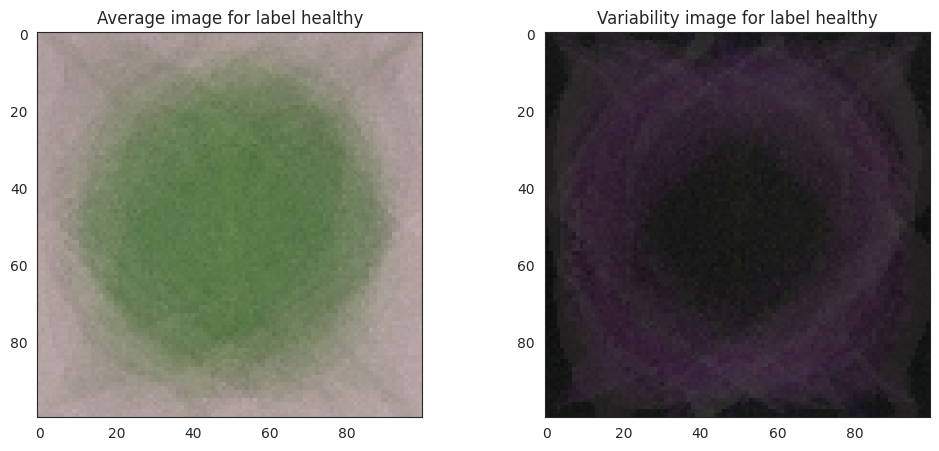

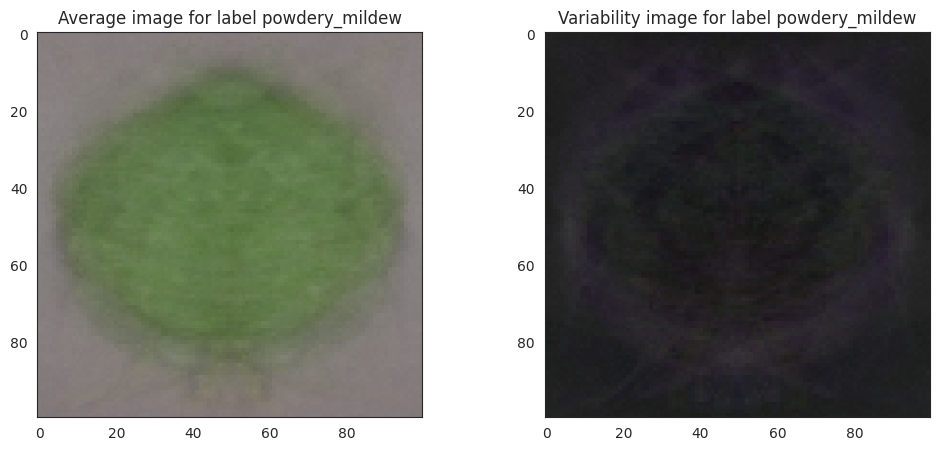

In [49]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

## Difference between average healthy and powdery mildew images

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/mildew-detection/path/to/save/images/avg_diff_powdery_mildew_vs_healthy.png'

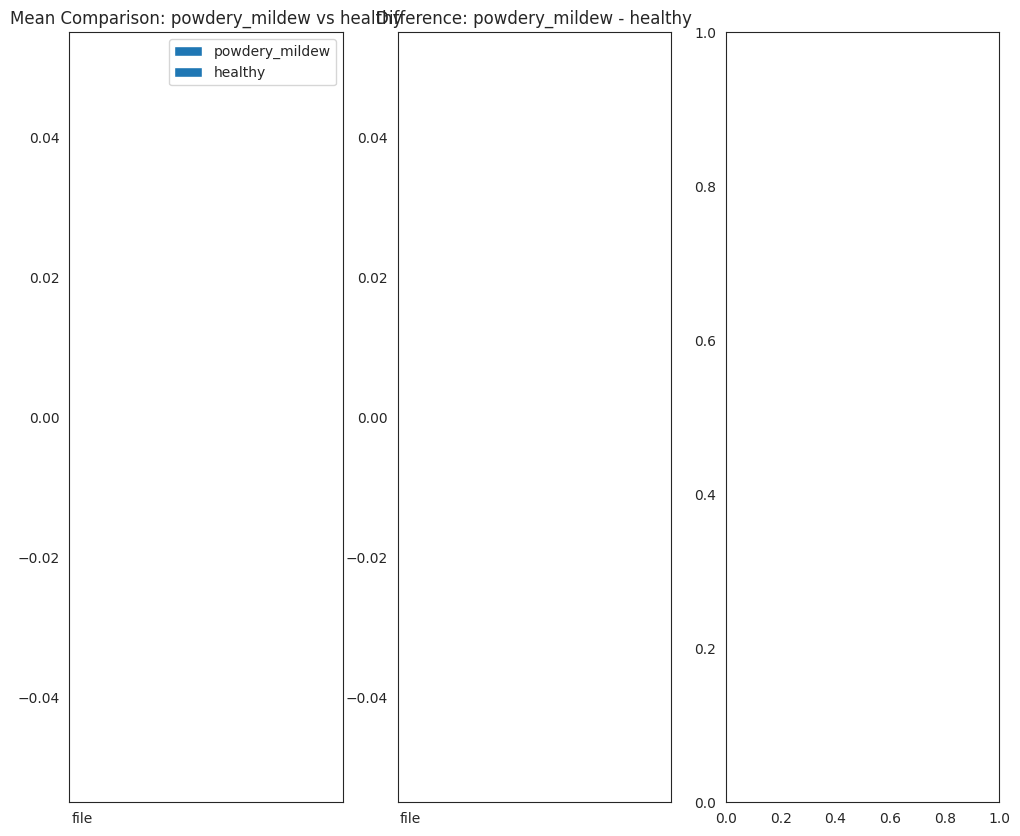

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def diff_bet_avg_image_labels_data_as_df(train_df, label_1, label_2, figsize=(20, 5), save_image=False, file_path="."):
    """
    Checks if the labels exist in the set of unique labels
    Calculates the mean and difference for label1 and label2
    Plots a chart and saves it 
    """
    sns.set_style("white")

    labels = train_df['label'].unique()
    if (label_1 not in labels) or (label_2 not in labels):
        print(f"Either label {label_1} or label {label_2} are not in {labels}")
        return

    # Extract data for label 1 and label 2
    label1_data = train_df[train_df['label'] == label_1].drop(columns=['label'])
    label2_data = train_df[train_df['label'] == label_2].drop(columns=['label'])

    # Calculate the mean value of label 1 and label 2
    label1_mean = label1_data.mean()
    label2_mean = label2_data.mean()

    # Calculate the difference between the means
    difference_mean = label1_mean - label2_mean

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].bar(label1_data.columns, label1_mean, color='blue', alpha=0.7, label=label_1)
    axes[0].bar(label2_data.columns, label2_mean, color='red', alpha=0.7, label=label_2)
    axes[0].set_title(f'Mean Comparison: {label_1} vs {label_2}')
    axes[0].legend()

    axes[1].bar(label1_data.columns, difference_mean, color='green', alpha=0.7)
    axes[1].set_title(f'Difference: {label_1} - {label_2}')

    if save_image:
        plt.savefig(f"{file_path}/avg_diff_{label_1}_vs_{label_2}.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

# Assuming train_df, label_1, and label_2 are defined elsewhere in the notebook
diff_bet_avg_image_labels_data_as_df(train_df, label_1='powdery_mildew', label_2='healthy',
                                    figsize=(12, 10),
                                    save_image=True,
                                    file_path=file_path)

## Image montage

Using X_train and y_train as variables, because these arrays already contain the resized image size. This ensures that the montage function works with the preprocessed, smaller images.

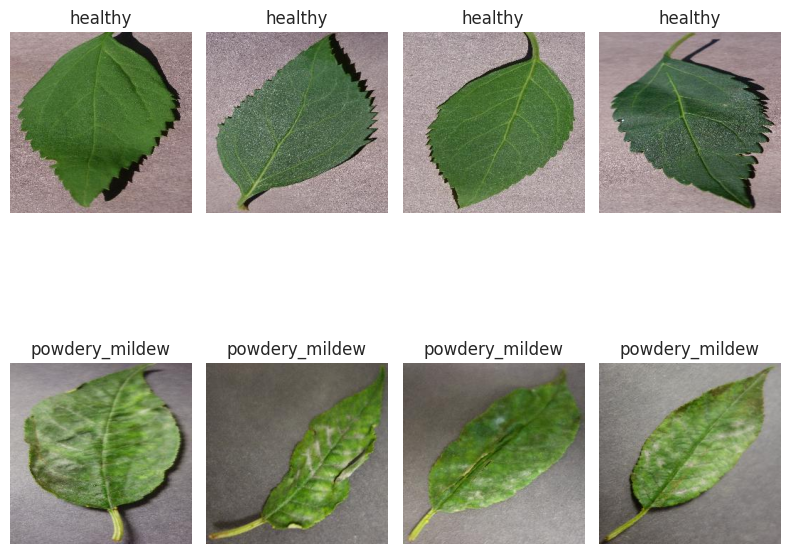

In [32]:
# Parts of code borrowed from linx02 - genderpredictor 
import matplotlib.pyplot as plt
import pandas as pd

# Image montage / Sample of dataset
sample_size = 8  # Total number of images

healthy_df = train_df[train_df['label'] == 'healthy']
powdery_mildew_df = train_df[train_df['label'] == 'powdery_mildew']

sample_healthy = healthy_df.sample(n=round(sample_size / 2))
sample_powdery_mildew = powdery_mildew_df.sample(n=round(sample_size / 2))

sample = pd.concat([sample_healthy, sample_powdery_mildew])

cols = 4  # Number of columns in the montage
rows = (sample_size + cols - 1) // cols  # Calculate the number of rows

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for i, image_path in enumerate(sample['file']):
    ax = axes[i // cols, i % cols]
    img = plt.imread(image_path)
    ax.imshow(img)
    ax.set_title(sample.iloc[i]['label'])  
    ax.axis('off')

# Remove any empty subplots
for i in range(sample_size, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

---